In [21]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d

In [22]:
# Carga la base de datos CasasSimple.txt
data = np.loadtxt('CasasSimple.txt')

train_X = np.c_[data[:,0]/100]
train_Y = np.c_[data[:,1]/100000]

Text(0,0.5,'Precio en S/ 100,000s')

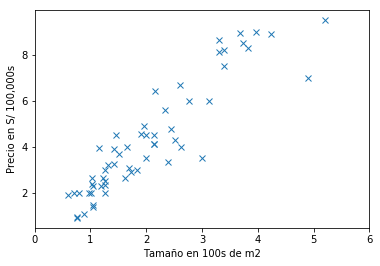

In [23]:
# Visualiza los datos y 
plt.plot(train_X, train_Y, 'x')
plt.xlim(0,6)
plt.xlabel('Tamaño en 100s de m2')
plt.ylabel('Precio en S/ 100,000s')

In [24]:
# Elige los parámetros de learning_rate y training_epochs
learning_rate = 0.001
training_epochs = 500
display_step = 50

In [30]:
# Crea los placeholders 'X' y 'Y' de tipo float para el modelo
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Crea las variables 'W' y 'b' e inicializalas con valores aleatorios
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Crea el modelo usando la funcion lineal h = WX + b
pred = tf.add(tf.multiply(X, W), b)

# Crea la funcion de costo (MSE)
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*len(train_X))

Epoch: 0050 costo= 11.135903358 W= 0.455848 b= -0.944115


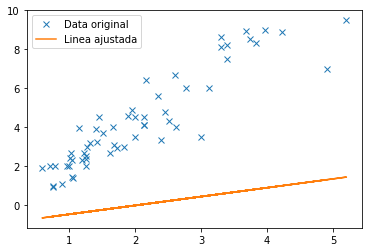

Epoch: 0100 costo= 6.195289135 W= 0.914814 b= -0.758759


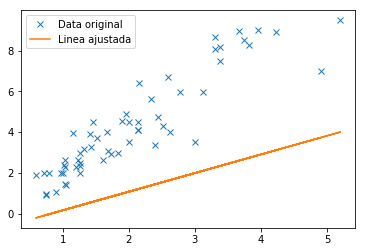

Epoch: 0150 costo= 3.548507929 W= 1.25023 b= -0.621871


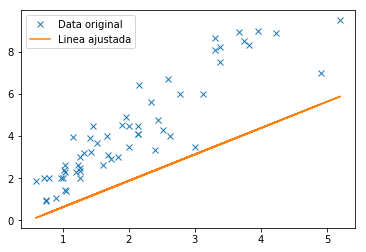

Epoch: 0200 costo= 2.130418301 W= 1.49523 b= -0.520467


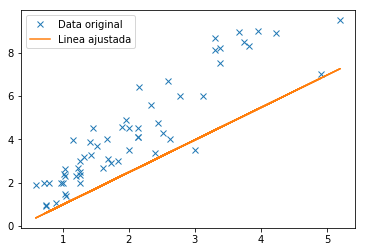

Epoch: 0250 costo= 1.370508432 W= 1.67407 b= -0.445045


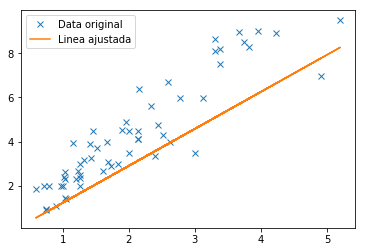

Epoch: 0300 costo= 0.963169456 W= 1.80448 b= -0.38865


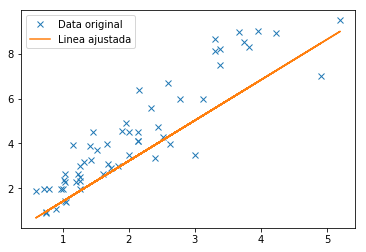

Epoch: 0350 costo= 0.744704664 W= 1.89946 b= -0.346191


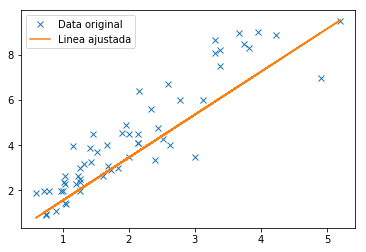

Epoch: 0400 costo= 0.627427995 W= 1.96851 b= -0.313942


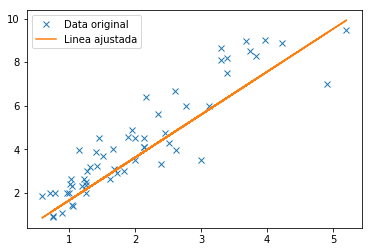

Epoch: 0450 costo= 0.564368844 W= 2.01858 b= -0.289179


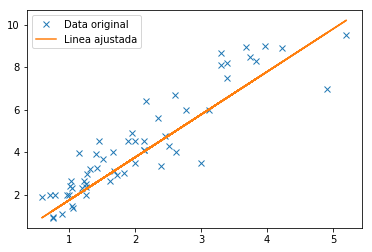

Epoch: 0500 costo= 0.530359864 W= 2.05478 b= -0.269903


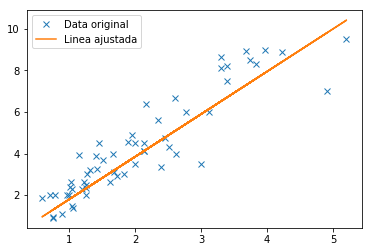

Terminado!
Costo= 0.53036 W= 2.05478 b= -0.269903 



In [31]:
# Crea optimizador usando Gradient Descent para minimizar la funcion de costo
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Inicializa todas las variables
init = tf.global_variables_initializer()

# Inicializa la sesion 
sess = tf.Session() 
sess.run(init)

J_history = np.zeros(training_epochs)

# Entrena el modelo
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    J_history[epoch] = sess.run(cost, feed_dict={X: train_X, Y:train_Y})

    # Imprime el valor de la funcion de costo y los valores de W y b cada n pasos
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print("Epoch:", '%04d' % (epoch+1), "costo=", "{:.9f}".format(c), \
            "W=", sess.run(W), "b=", sess.run(b))
        # Visualiza el modelo obtenido con respecto a los datos originales
        plt.plot(train_X, train_Y, 'x', label='Data original')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linea ajustada')
        plt.legend()
        plt.show()
        
print("Terminado!")
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Costo=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

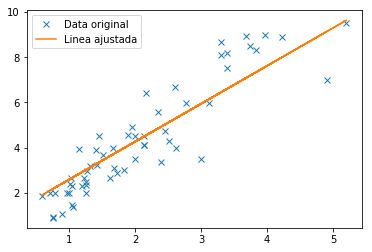

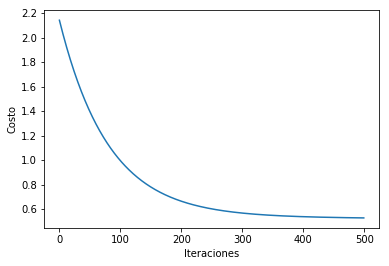

In [28]:
# Visualiza el comportamiento de la funcion de costo
plt.plot(J_history)
plt.ylabel('Costo')
plt.xlabel('Iteraciones');